In [28]:
# import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# import ml libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [29]:
dirty_data = pd.read_csv('dirty dataset.csv')
clean_data = pd.read_csv('clean dataset.csv')

drop_features = ['id', 'type', 'name', 'bayes_average_rating', 'playingtime']
dirty_data.drop(columns=drop_features, axis=1, inplace=True)
clean_data.drop(columns=drop_features, axis=1, inplace=True)

dirty_data = dirty_data[dirty_data['average_rating']>0]
dirty_data = dirty_data[dirty_data['average_weight']>0]
dirty_data = dirty_data[dirty_data['yearpublished']>1950]

clean_data = clean_data[clean_data['average_rating']>0]
clean_data = clean_data[clean_data['average_weight']>0]
clean_data = clean_data[clean_data['yearpublished']>1950]

In [30]:
imputer = SimpleImputer(strategy='median')
data_columns = dirty_data.columns

dirty_data = imputer.fit_transform(dirty_data)
dirty_data = pd.DataFrame(data=dirty_data, columns=data_columns)

clean_data = imputer.fit_transform(clean_data)
clean_data = pd.DataFrame(data=clean_data, columns=data_columns)

<ipython-input-33-0f5a13972ade>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


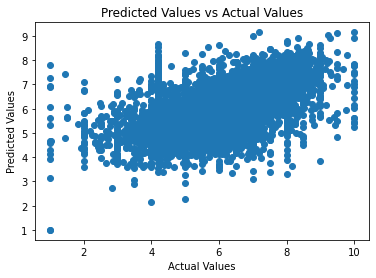

1.2201522457370741

In [33]:
X = dirty_data.drop(columns=['average_rating'])
y = dirty_data[['average_rating']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.75)

regressor = RandomForestRegressor(random_state = 0, max_depth=32, n_estimators=8)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test,y_pred)
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Predicted Values vs Actual Values')
plt.show()

mean_squared_error(y_test, y_pred)

<ipython-input-32-bed43d5d1360>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


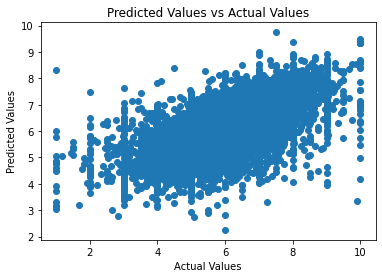

0.8914154531251011

In [32]:
X = clean_data.drop(columns=['average_rating'])
y = clean_data[['average_rating']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.75)

regressor = RandomForestRegressor(random_state = 0, max_depth=32, n_estimators=8)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test,y_pred)
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Predicted Values vs Actual Values')
plt.show()

mean_squared_error(y_test, y_pred)